In [1]:
import tensorflow as tf
from tensorflow.keras.layers import Masking, Flatten
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint
from sklearn.model_selection import KFold

2024-06-05 20:51:05.653612: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-06-05 20:51:05.697923: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-06-05 20:51:06.372143: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
import numpy as np
import pandas as pd
import cv2  # OpenCVライブラリ
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
import glob
import os
import sys
import pathlib
from pathlib import Path

from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [3]:
current_dir = os.getcwd()
parent_dir = os.path.dirname(current_dir)
sys.path.append(parent_dir)
current_file_path = pathlib.Path(os.getcwd())
parent_dir = current_file_path.parent

In [4]:
import fluid_intake_estimate
from fluid_intake_estimate import variable_data_set
from fluid_intake_estimate import cnn
from fluid_intake_estimate import mlp

/home/s2/Desktop/washino/swallowing
/home/s2/Desktop/washino/swallowing


In [5]:
directory_path = parent_dir / 'dataset'

# 鷲野のデータを学習

In [ ]:
path = directory_path / 'washino'
csv_path = path / 'washino.csv'
data = variable_data_set.VariableDataSet(300)
data.csv_to_dataset(path, csv_path, 0)
model = cnn.CNN()

In [ ]:
model_checkpoint = ModelCheckpoint(
    filepath='cnn_20240516_model_best.keras',  # 保存するファイルのパス
    monitor='val_mean_absolute_error',        # 監視する値
    save_best_only=True,       # 最良のモデルのみを保存
    verbose=1,                 # 進行状況のメッセージ表示
    mode='min'                 # 「減少」を監視
)

model.training(data.X, data.y, 50, 32, model_checkpoint = model_checkpoint)
model.save('cnn_20240516_model_v1.keras')

# 全員のデータを学習して分割交差検証

In [11]:
names = ['washino', 'haruki', 'ezumi', 'hikaru', 'ibuki', 'kanata', 'kazuki', 'kishimoto', 'kosasayama', 'mocchi', 'nakaryo', 'ruku', 'shibata', 'soichiro', 'tsuji']
data = variable_data_set.VariableDataSet(786, scale=1, time_range = 70000)
# data = variable_data_set.VariableDataSet(786, scale=0, time_range = 20000)

# path = directory_path / 'washino'
# csv_path = path / 'washino.csv'
# data.csv_to_dataset(path, csv_path, 0)

count = 0

for name in names:    
    path = directory_path / name
    wav_files = glob.glob(os.path.join(path, '*.wav'))
    wav_file_count = len(wav_files)    
    
    csv_path = path / f'{name}.csv'    
    data.csv_to_dataset(path, csv_path, count, signal_processing='No')
    count += wav_file_count
    print(count)

352
382
413
444
474
504
538
571
601
631
661
694
724
755
786


In [12]:
# 分割交差検証の設定
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# データを保持するためのリスト
train_data_splits_index = []
test_data_splits_index = []

# データのインデックスを分割
for train_index, test_index in kf.split(data.X):
    train_data_splits_index.append(train_index)
    test_data_splits_index.append(test_index)

In [13]:
y = []
predict = []

In [27]:
model = cnn.CNN(scale = 1, time_range = 70000)
# model = mlp.MLP(time_range = 20000)

model_checkpoint = ModelCheckpoint(
    filepath='nopro_cnn_20240605_model_best_4.keras',  # 保存するファイルのパス
    monitor='val_mean_absolute_error',        # 監視する値
    save_best_only=True,       # 最良のモデルのみを保存
    verbose=1,                 # 進行状況のメッセージ表示
    mode='min'                 # 「減少」を監視
)


use_data = 4
print(data.X.shape)
model.training(data.X[train_data_splits_index[use_data]], data.y[train_data_splits_index[use_data]], 50, 32)
model.evaluate(data.X[test_data_splits_index[use_data]], data.y[test_data_splits_index[use_data]])
model.save('nopro_cnn_20240605_model_4.keras')

(786, 70000, 1)
Epoch 1/50
18/18 [==============================] - 2s 33ms/step - loss: 0.6111 - mean_absolute_error: 0.3956 - mean_squared_error: 0.6111 - val_loss: 0.0853 - val_mean_absolute_error: 0.2538 - val_mean_squared_error: 0.0853
Epoch 2/50
18/18 [==============================] - 0s 23ms/step - loss: 0.0806 - mean_absolute_error: 0.2402 - mean_squared_error: 0.0806 - val_loss: 0.0848 - val_mean_absolute_error: 0.2483 - val_mean_squared_error: 0.0848
Epoch 3/50
18/18 [==============================] - 0s 24ms/step - loss: 0.0840 - mean_absolute_error: 0.2425 - mean_squared_error: 0.0840 - val_loss: 0.0906 - val_mean_absolute_error: 0.2582 - val_mean_squared_error: 0.0906
Epoch 4/50
18/18 [==============================] - 0s 26ms/step - loss: 0.0746 - mean_absolute_error: 0.2311 - mean_squared_error: 0.0746 - val_loss: 0.0845 - val_mean_absolute_error: 0.2507 - val_mean_squared_error: 0.0845
Epoch 5/50
18/18 [==============================] - 0s 26ms/step - loss: 0.0717 - me

18/18 [==============================] - 0s 23ms/step - loss: 3.2860e-04 - mean_absolute_error: 0.0138 - mean_squared_error: 3.2860e-04 - val_loss: 0.1054 - val_mean_absolute_error: 0.2737 - val_mean_squared_error: 0.1054
Epoch 37/50
18/18 [==============================] - 0s 26ms/step - loss: 3.2886e-04 - mean_absolute_error: 0.0133 - mean_squared_error: 3.2886e-04 - val_loss: 0.1046 - val_mean_absolute_error: 0.2723 - val_mean_squared_error: 0.1046
Epoch 38/50
18/18 [==============================] - 0s 25ms/step - loss: 2.8013e-04 - mean_absolute_error: 0.0126 - mean_squared_error: 2.8013e-04 - val_loss: 0.1043 - val_mean_absolute_error: 0.2715 - val_mean_squared_error: 0.1043
Epoch 39/50
18/18 [==============================] - 0s 26ms/step - loss: 3.5421e-04 - mean_absolute_error: 0.0136 - mean_squared_error: 3.5421e-04 - val_loss: 0.1039 - val_mean_absolute_error: 0.2727 - val_mean_squared_error: 0.1039
Epoch 40/50
18/18 [==============================] - 0s 27ms/step - loss: 3.

In [28]:
y.append(data.y[test_data_splits_index[use_data]])
predict.append(model.predictions)

In [29]:
print(len(predict))

5


In [30]:
array_y = np.concatenate(y)
array_pre = np.concatenate(predict)

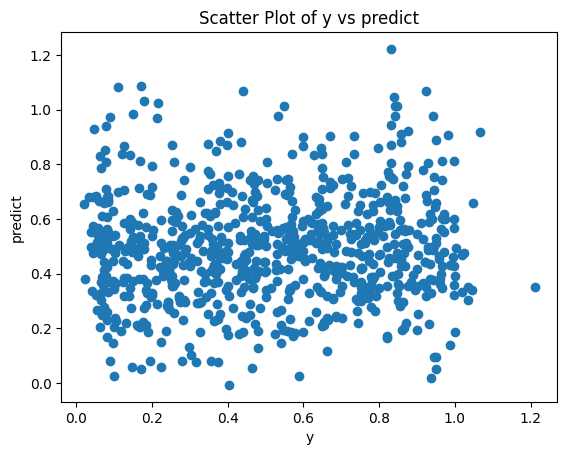

R2 Score: -0.38209564814297936
Mean Absolute Error (MAE): 0.2719317125951156
Root Mean Squared Error (RMSE): 0.3351683418134428


In [31]:
plt.scatter(array_y, array_pre)
plt.xlabel('y')
plt.ylabel('predict')
plt.title('Scatter Plot of y vs predict')
plt.show()

# R2スコアの計算
r2 = r2_score(array_y, array_pre)
print(f"R2 Score: {r2}")

# MAEの計算
mae = mean_absolute_error(array_y, array_pre)
print(f"Mean Absolute Error (MAE): {mae}")

      
      # RMSEの計算
rmse = np.sqrt(mean_squared_error(array_y, array_pre))
print(f"Root Mean Squared Error (RMSE): {rmse}")

In [ ]:
array_pre = array_pre.flatten()

In [ ]:
combined_array = np.vstack((array_y, array_pre)).T
np.savetxt("mlp_20240520.csv", combined_array, delimiter=",", header="y,predict", comments='')

In [ ]:
df0 = pd.read_csv("stft_cnn_20240520_0.csv")
print(df0)
df1 = pd.read_csv("stft_cnn_20240520_1.csv")
print(df1)
df2 = pd.read_csv("stft_cnn_20240520_2.csv")
print(df2)
df3 = pd.read_csv("stft_cnn_20240520_3.csv")
print(df3)
df4 = pd.read_csv("stft_cnn_20240520_4.csv")
print(df4)

In [ ]:
df = [df0, df1, df2, df3, df4]
combined_df = pd.concat(df, ignore_index=True)

# 結合したDataFrameを表示
print(combined_df)

In [ ]:
plt.scatter(combined_df['y'], combined_df['predict'])
plt.xlabel('y')
plt.ylabel('predict')
plt.title('Scatter Plot of y vs predict')
plt.show()

# R2スコアの計算
r2 = r2_score(combined_df['y'], combined_df['predict'])
print(f"R2 Score: {r2}")

# MAEの計算
mae = mean_absolute_error(combined_df['y'], combined_df['predict'])
print(f"Mean Absolute Error (MAE): {mae}")

      
      # RMSEの計算
rmse = np.sqrt(mean_squared_error(combined_df['y'], combined_df['predict']))
print(f"Root Mean Squared Error (RMSE): {rmse}")